<a href="https://colab.research.google.com/github/ganeshbmc/MLT/blob/master/colabs_mlt/wk7_smr_mlt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Softmax regression  

* Softmax regresssion is a classification method, which generalizes logistic regression.  
* It is used for multiclass classfification problems.  

[Lecture video](https://youtu.be/jQiGzIllLsk)  

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

## Training data  

* MNIST handwritten digit dataset

  * Feature matrix  
  * Label (one of k labels)

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


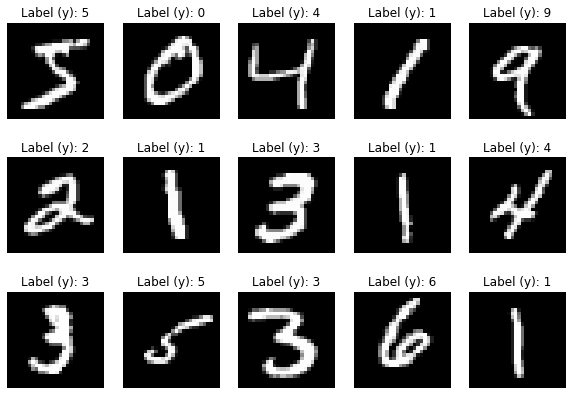

In [3]:
# Plotting some data samples  
fig = plt.figure(figsize=(10,7))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=train_y[i]))
    plt.axis('off')

Observe that
* Each image is a grayscale image with size 28*28 pixels.  

We flattern each input image into a vector of length 784 (28*28) and these 784 numbers represent intensity at each pixel in an image.  

In [4]:
X_train = train_X.reshape(train_X.shape[0], 28*28)
X_test = test_X.reshape(test_X.shape[0], 28*28)

Each pixel takes values between 0 and 255. We scale each value by dividing with 255.  

In [5]:
# Normalizing  
X_train = X_train/255
X_test = X_test/255

**Important step**:  
> For softmax regression, label vector **y** needs to be represented in **one-hot encoding**.  

In [6]:
def convert_to_one_hot_encoding(y, k):
  # A zero matrix of size (m,k)
  y_one_hot = np.zeros((len(y), k))

  # Putting 1 for column where the label is using multidimensional indexing.  
  y_one_hot[np.arange(len(y), y)] = 1
  return y_one_hot

## Model  

In the following section, the total number of classes are denoted by c.  
[video link](https://youtu.be/jQiGzIllLsk?t=365)  

The softmax regression has two stages:  
1. Linear combination (in vectorized form)  
2. Softmax non-linear transformation (in vectorized form)  

Softmax classifier provides a probability of an example belonging to a class.

## Softmax regression implementation  

**Step 1**: In vectorized form, we implement: **Z = XW + b**  

Each class has m+1 parameters, one bias and m weights corresponding to m features.  

In [7]:
def linear_combination(X, w, b):
  return X@w + b

**Step 2**: Calculate the softmax for each class using the above formula [video link](https://youtu.be/jQiGzIllLsk?t=560).  

* The sum of softmax across all classes for a given sample is 1.  
* The class label with the highest value of softmax is assigned to the sample.  

**Note**: Every class has a different set of weights and a bias.  

In [8]:
def softmax(z):
  # z --> linear part.
  # subtracting the max of z for numerical stability.  
  exp = np.exp(z - np.max(z))

  # calulating softmax for all examples.  
  for i in range(len(z)):
    exp[i] /= np.sum(exp[i])

  return exp

## Loss function: categorical cross entropy loss  

[video link](https://youtu.be/jQiGzIllLsk?t=639)  

## Optimization  

IMPORTANT: Explanation of optimization in softmax regression is explained in great detail.  

[video link](https://youtu.be/jQiGzIllLsk?t=690)  

## Training  

1. Initialize parameters: `w` and `b`.
2. Find optimal `w` and `b` using Gradient descent.
3. Use `softmax(w.X + b)` to predict.  

In [9]:
def fit(X, y, lr, c, epochs):
  '''PENDING... TO BE CONINUED'''
  pass